In [1]:
import numpy as np
import pandas as pd

Создадим искусственный датасет, в котором целевой переменной возьмем цену на авиабилет

In [145]:
n_samples = 1000

age = np.random.choice(70, n_samples) + 20 # возраст покупателя
distance = np.random.choice(6000, n_samples) + 500 # расстояние полета
company = np.random.choice(5, n_samples) + 1 # компания (1 - самая дешевая, 5 - самая дорогая)
baggage = np.random.choice(3, n_samples) # кол-во мест багажа
service = 100 # сервисный сбор

ticket_price = company * distance + company * baggage * 100 + service

data = pd.DataFrame({'age': age, 'distance': distance, 'company': company, 'baggage': baggage, 'ticket_price': ticket_price})
data.head()

,age,distance,company,baggage,ticket_price
0,61,2146,3,1,6838
1,88,2428,3,2,7984
2,57,3828,2,2,8156
3,57,2512,1,1,2712
4,50,1654,4,2,7516


In [146]:
X = data[['age', 'distance', 'company', 'baggage']]
y = data['ticket_price']

Построим модель линейной регрессии, которая использует все имеющиеся изначально признаки

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)

In [148]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_predict, y)

1794.0211695322366

Посмотрим на графиках, какая из переменных менее всего влияет на ticket_price. Видим, что ticket_price не имеет явной зависимости от age и слабую зависимость от baggage. Т.к. baggage имеет малый набор значений, попробуем сначала исключить age.   

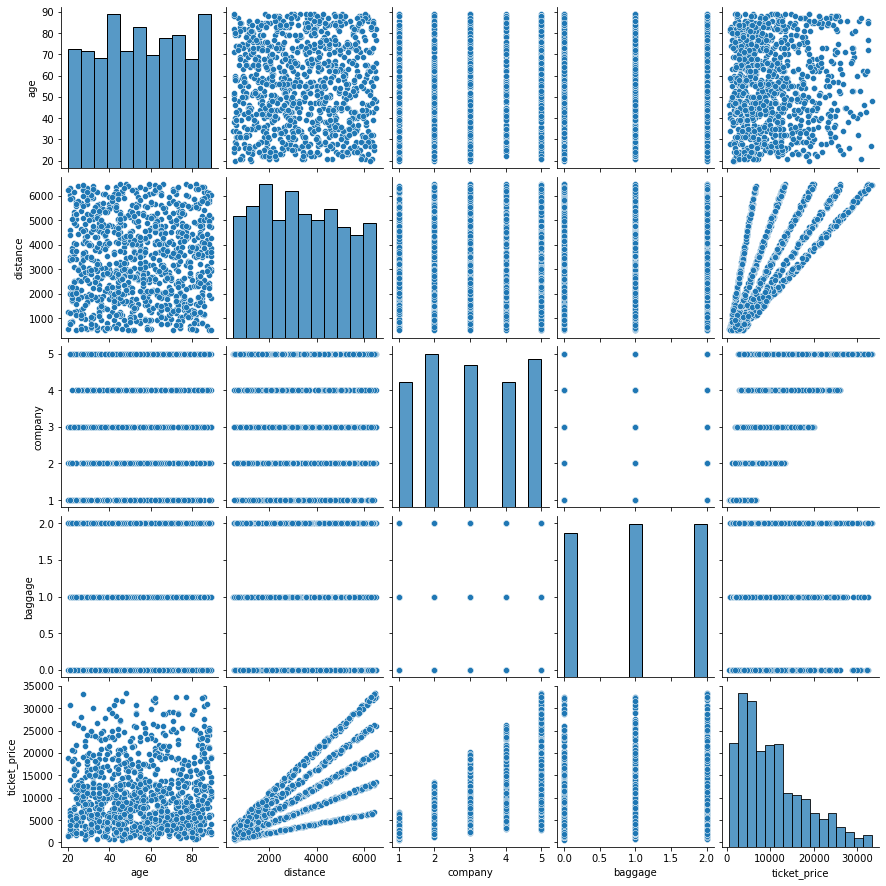

In [149]:
import seaborn as sns
sns.pairplot(data)

Построим модель без учета признака age

In [151]:
X1 = data[['distance', 'company', 'baggage']]
model1 = LinearRegression().fit(X1, y)
y_predict1 = model1.predict(X1)

mean_absolute_error(y_predict1, y)

1792.3497050386522

Ошибка уменьшилась, но незначительно

Попробуем создать новую переменную. Воспользуемся PolynomialFeatures.

In [152]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X1)
poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [153]:
model2 = LinearRegression().fit(X2, y)
model2.coef_ #коэффициенты перед соответсвующими feature_names 

array([ 0.00000000e+00,  2.88632688e-15, -1.31917457e-12, -6.67146130e-13,
        1.94703557e-19,  1.00000000e+00,  8.59839625e-17, -2.35010392e-13,
        1.00000000e+02, -1.46654117e-12])

Наибольший коэффициент имеют слагаемые с множителями 'x0 x1' и 'x1 x2'. Введем новые переменные.

In [158]:
X1.columns

Index(['distance', 'company', 'baggage'], dtype='object')

In [159]:
# x0 = distance, x1 = company, x2 = baggage
data['distance_price'] = data['distance'] * data['company']
data['baggage_price'] = data['company'] * data['baggage']
data.head()

,age,distance,company,baggage,ticket_price,distance_price,baggage_price
0,61,2146,3,1,6838,6438,3
1,88,2428,3,2,7984,7284,6
2,57,3828,2,2,8156,7656,4
3,57,2512,1,1,2712,2512,1
4,50,1654,4,2,7516,6616,8


In [160]:
X3 = data[['distance_price', 'baggage_price']]
model3 = LinearRegression()
model3.fit(X3, y)
y_predict3 = model3.predict(X3)
mean_absolute_error(y_predict3, y)

2.1772166292066686e-12

Ошибка уменьшилась очень значительно